In [1]:
%reload_ext autoreload
%autoreload 3

In [2]:
# webview
# import cortex
# cortex.webshow(cortex.Volume.random("S1", "fullhead"))

In [ ]:
# left, right = cortex.db.S1.surfaces.inflated.get()
# cortex.db.S1.surfaces.flat.show()

Found 100.00% of EBA
Cutting 0 overlapping voxels (should be < ~50)


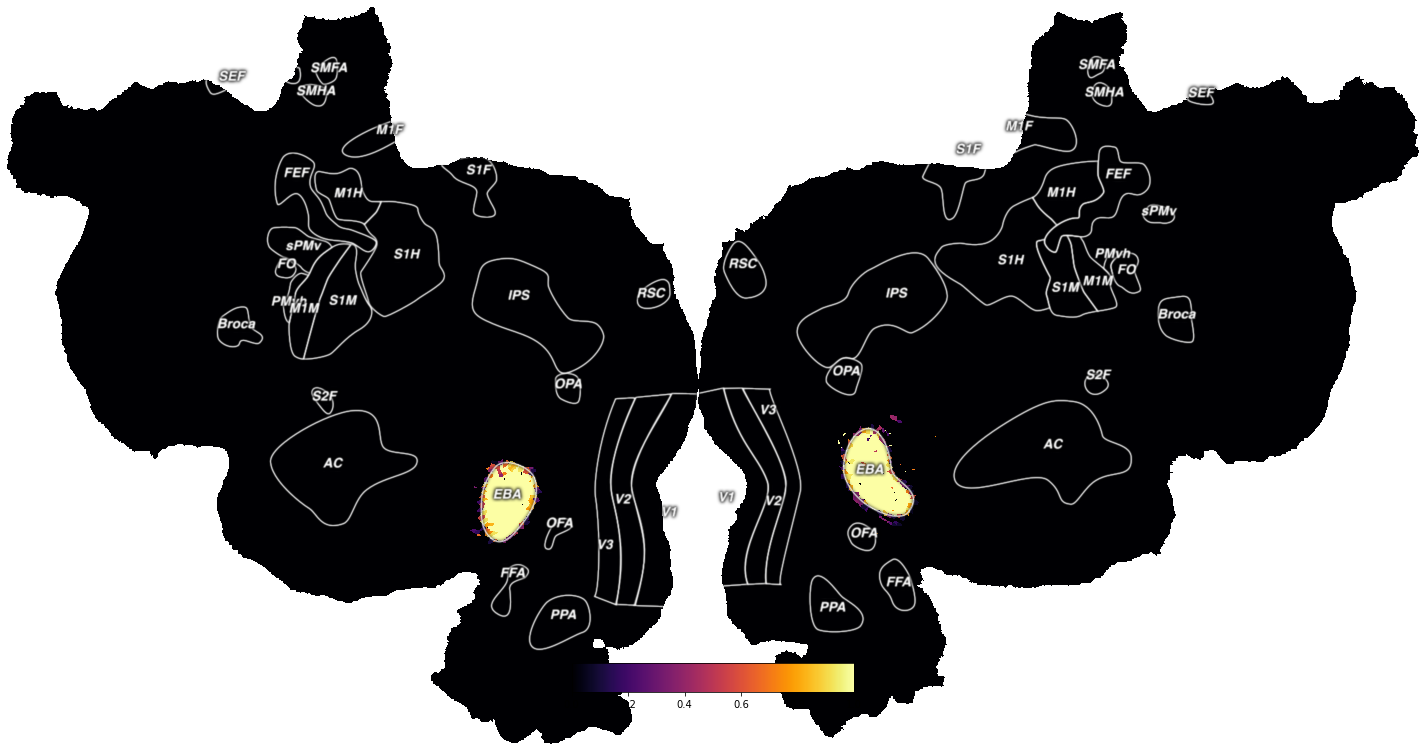

In [16]:
import cortex
import matplotlib.pyplot as plt

subject = "S1"
xfm = "fullhead"
roi = "EBA"

# Get the map of which voxels are inside of our ROI
roi_masks = cortex.utils.get_roi_masks(subject, xfm,
                                       roi_list=[roi],
                                       gm_sampler='cortical-conservative', # Select only voxels mostly within cortex
                                       split_lr=False, # No separate left/right ROIs
                                       threshold=None, # Leave roi mask values as probabilites / fractions
                                       return_dict=True
                                       )

# # Plot the mask for one ROI onto a flatmap
roi_data = cortex.Volume(roi_masks[roi], subject, xfm,
                         vmin=0, # This is a probability mask, so only
                         vmax=1, # so scale btw zero and one
                         cmap="inferno", # For pretty
                         )

cortex.quickflat.make_figure(roi_data,
                             thick=1, # select a single depth (btw white matter & pia)
                             sampler='nearest', # no interpolation
                             with_curvature=False,
                             with_colorbar=True,
                             )

plt.show()

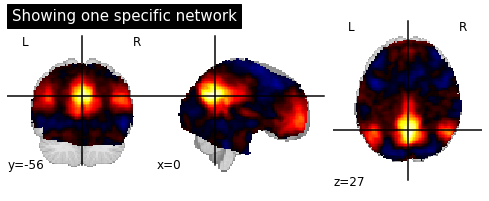

In [23]:
from nilearn import datasets
from nilearn import plotting, image

smith_atlas = datasets.fetch_atlas_smith_2009()
rsn10_img = smith_atlas.rsn10

img = image.index_img(rsn10_img, 3)

coords = plotting.find_xyz_cut_coords(img)
coords

# display = plotting.plot_anat(cut_coords=coords,
#                              title='Regions from this network')

display = plotting.plot_stat_map(img, cut_coords=coords, colorbar=False,
                                 title='Showing one specific network')
# display.add_overlay(img,
#                     cmap=plotting.cm.alpha_cmap('r'))

plotting.show()

/usr/local/Caskroom/miniforge/base/envs/acnets/lib/python3.9/site-packages/nilearn/plotting/img_plotting.py:300: FutureWarning: Default resolution of the MNI template will change from 2mm to 1mm in version 0.10.0
  anat_img = load_mni152_template()


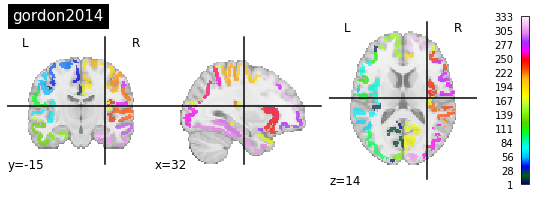

In [2]:
from nilearn import datasets, plotting, image

import matplotlib.pyplot as plt

from python.acnets.parcellations.gordon  import fetch_atlas as fetch_gordon2014_atlas
from python.acnets.parcellations.dosenbach import load_masker
gordon2014_atlas = fetch_gordon2014_atlas()
# plotting.plot_roi(atlas.maps, title='atlas', colorbar=True)

# atlas = datasets.fetch_atlas_difumo()
# plotting.plot_img(image.load_img(atlas.maps).slicer[...,1])

dosenbach2010_masker, dosennbach2010_rois = load_masker(atlas_name='dosenbach2010')

plotting.plot_roi(gordon2014_atlas.maps, title='gordon2014', colorbar=True)

plt.show()

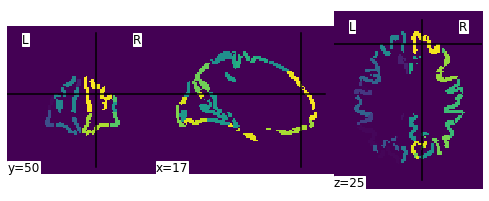

In [3]:
plotting.plot_img(image.load_img(gordon2014_atlas.maps))

In [4]:
import numpy as np
network_map = image.load_img(gordon2014_atlas.maps).get_fdata().squeeze()
# network_map.max()
labels = gordon2014_atlas.labels.reset_index()
labels['network_index'] = labels['network'].astype('category').cat.codes + 1

reg2net_func = lambda x: labels[['network_index']].values[int(x)-1,0].astype('float') if x > 0 else x

network_map = np.vectorize(reg2net_func)(network_map)
network_map = network_map[..., np.newaxis]

/var/folders/3_/gmvd1nkx285133z5yh3chz2c0000gp/T/ipykernel_41944/1911144503.py:11: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


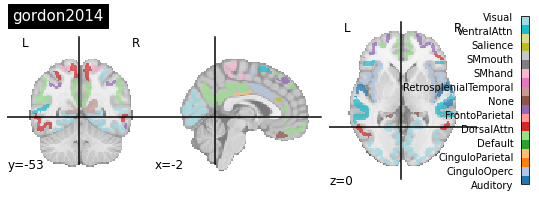

In [41]:
network_img = image.new_img_like(gordon2014_atlas.maps, network_map)
display = plotting.plot_roi(network_img,
                            title='gordon2014',
                            # cut_coords=[18, -81, -33],
                            colorbar=True, cmap='tab20')
network_names = labels.network.astype('category').cat.categories.to_list()

display._colorbar_ax.set_yticks(range(1, 14))
display._colorbar_ax.set_yticklabels(network_names)

plt.show()

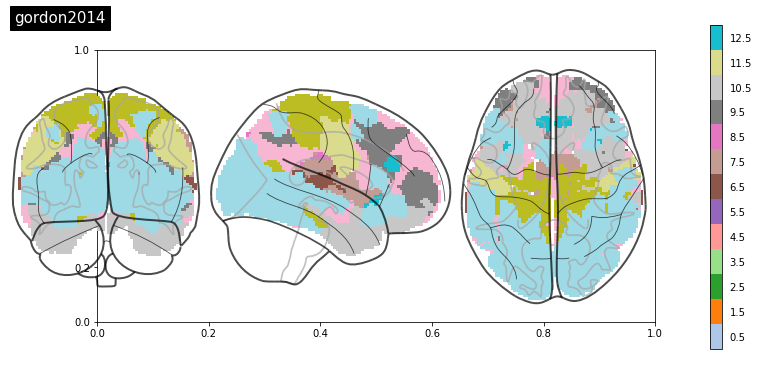

In [149]:
from matplotlib.colorbar import ColorbarBase
import matplotlib

network_names = labels.network.astype('category').cat.categories.to_list()
n_networks = len(network_names)

fig, ax = plt.subplots(1,1, figsize=(10,5))

norm=matplotlib.colors.Normalize(vmin=-0.5, vmax=n_networks+0.5) # MORTY

display = plotting.plot_glass_brain(
    network_img, title='gordon2014',
                          colorbar=True,
                          symmetric_cbar=True,
                          plot_abs=True,
                          annotate=False,
                          cmap='tab20',
                          figure=fig)

# display._colorbar_ax.set_yticks(np.arange(.5, 13.5, 1))

colorbar = ColorbarBase(display._colorbar_ax,
                        ticks=np.arange(.5,n_networks+.5, 1),
                        norm=norm,
                        orientation='vertical',
                        cmap='tab20',
                        boundaries=np.arange(0,n_networks+1),
                        spacing='uniform')

# display._colorbar_ax.set_yticklabels(network_names)


plt.show()